In [8]:
#import section
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
original_image = Image.open("lena.png") # Name of the image here is we can change the image we will use
original_image_grayscale = ImageOps.grayscale(original_image)

The image size is: 512 width per 512 height


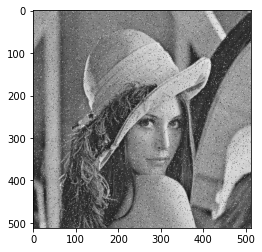

In [9]:
#original image info and visualization of the image selected
plt.imshow(original_image)
width,height=original_image_grayscale.size
print("The image size is: {} width per {} height".format(width,height))

In [10]:
# Salt and pepper  using median filter fuction
'''
input of the fuction is the image with noise of anomaly and the size of the kernel or dinamic matrix per default is 3
return filtered image
'''
def salt_and_pepper_filter(original_image_grayscale): 
   #3x3 dinamic matrix
   # set kernel size 
   kernel_size = 3
   # First we need to obtain the size of the image width and height
   width, height =original_image_grayscale.size
   #Create a result image that we need to work with it and we will full with valid values
   Filtered = np.zeros((height,width,3), np.uint8) #8 bit values unsigned int (0-255)
   imagew= original_image_grayscale.load() #loading original image to work with it 
   #Now is time to find the median of the pixels and replace the center pixel value
   #nested for to work with the image and the dinamic matrix
   for i in range(1, width-1):       #go across the width of the image
     for j in range(1, height-1):    # go across the height
           if i in [0,width-1] or j in [0,height-1]:
               Filtered[i,j] = imagew[i,j]
           else:
               #here we go to kernel or dinamic matrix
               wm= [0]*9  #working matrix  
               for x in range(kernel_size):
                     for y in range(kernel_size):
                         wm[x*3+y] = imagew[i-1+x,j-1+y]  # filling array
               workingmtx =np.array(wm)
               workingmtx.sort(axis=0)  #sort data
               Filtered[j,i] = workingmtx[4]   # now remplaced the pixel with sorted center value
   return (Filtered) # return filtered image


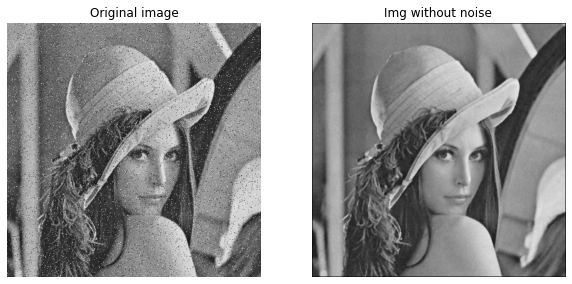

In [11]:
#Now we can call the function to filter
filtered_1 = salt_and_pepper_filter(original_image_grayscale)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10 , 10))
ax1.title.set_text("Original image")
ax1.axis("off")
ax1.imshow(original_image)
ax2.title.set_text("Img without noise")
ax2.axis("off")
ax2.imshow(filtered_1, cmap='gray')
#save result image
plt.imsave('Filtered_image.jpg', filtered_1, cmap='gray')